# Inflation Review (G8 countries) - Time Series

In [1]:
# Data from gapminder.org (.csv)
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

The inflation csv has all country's inflation since 1961

In [2]:
# load into a pandas DataFrame
# missing data shown as NaN
df=pd.read_csv('inflation.csv')
df.head() # show the first few rows

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.18,-2.11000,9.44,10.60,8.30,3.88000,0.596,2.430,5.120,4.87
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.63,2.42000,4.49,2.31,1.04,0.29000,1.550,0.564,-0.481,1.37
2,Algeria,3.47,2.35,0.549,1.7,1.5,1.82,1.31,3.14,1.92,...,15.40,-11.20000,16.10,18.20,7.48,-0.06180,-0.290,-6.570,0.890,6.80
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.98,-0.00001,1.60,2.50,1.10,0.00036,-0.100,-0.455,0.700,0.90
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.70,-7.42000,22.40,24.10,5.73,3.75000,-1.310,-3.980,27.700,31.10


In [3]:
# The .csv has countries down and years across
# Transpose so years go down, countries go across (time series)
dfts0 = df.transpose()
dfts0

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1961,NaN,NaN,3.47,NaN,NaN,NaN,20.3,NaN,3.22,5.09,...,3.38,1.35,18.4,NaN,NaN,0.469,NaN,NaN,-3.66,-2.04
1962,NaN,NaN,2.35,NaN,NaN,NaN,28.9,NaN,-0.0757,3.34,...,3.72,1.24,12,NaN,NaN,1.94,NaN,NaN,2.09,0.47
1963,NaN,NaN,0.549,NaN,NaN,NaN,25.6,NaN,1.79,3.68,...,1.97,1.09,19.9,NaN,NaN,3.95,NaN,NaN,0.404,-2.35
1964,NaN,NaN,1.7,NaN,NaN,NaN,28.8,NaN,3.29,3.18,...,4.05,1.5,40.4,NaN,NaN,0.993,NaN,NaN,4.08,6.14
1965,NaN,NaN,1.5,NaN,NaN,NaN,21.2,NaN,2.98,5.32,...,4.8,1.92,62.2,NaN,NaN,2.34,NaN,NaN,10.6,2.7
1966,NaN,NaN,1.82,NaN,NaN,NaN,25.6,NaN,2.68,3.12,...,4.32,2.9,72.3,NaN,NaN,3.58,NaN,NaN,23.6,-3.73
1967,NaN,NaN,1.31,NaN,NaN,NaN,29,NaN,4.87,3.25,...,2.89,3.15,78.5,NaN,NaN,0.868,NaN,NaN,0.263,0.577
1968,NaN,NaN,3.14,NaN,NaN,NaN,10.3,NaN,2.25,2.84,...,4.21,4.37,116,NaN,NaN,2.04,NaN,NaN,15.9,3.87
1969,NaN,NaN,1.92,NaN,NaN,NaN,7.8,NaN,4.75,2.73,...,5.45,4.96,27.1,NaN,NaN,3.25,NaN,NaN,22.9,5.08


In [4]:
# in the .csv load, the country names were not loaded as row indexes
# replace the header names with the countries from the first row
new_header = dfts0.iloc[0] # grab the first row for the header
dfts = dfts0[1:] # drop row 0 (coutry names)
dfts.columns = new_header # set the header row as the country names
dfts

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
1961,NaN,NaN,3.47,NaN,NaN,NaN,20.3,NaN,3.22,5.09,...,3.38,1.35,18.4,NaN,NaN,0.469,NaN,NaN,-3.66,-2.04
1962,NaN,NaN,2.35,NaN,NaN,NaN,28.9,NaN,-0.0757,3.34,...,3.72,1.24,12,NaN,NaN,1.94,NaN,NaN,2.09,0.47
1963,NaN,NaN,0.549,NaN,NaN,NaN,25.6,NaN,1.79,3.68,...,1.97,1.09,19.9,NaN,NaN,3.95,NaN,NaN,0.404,-2.35
1964,NaN,NaN,1.7,NaN,NaN,NaN,28.8,NaN,3.29,3.18,...,4.05,1.5,40.4,NaN,NaN,0.993,NaN,NaN,4.08,6.14
1965,NaN,NaN,1.5,NaN,NaN,NaN,21.2,NaN,2.98,5.32,...,4.8,1.92,62.2,NaN,NaN,2.34,NaN,NaN,10.6,2.7
1966,NaN,NaN,1.82,NaN,NaN,NaN,25.6,NaN,2.68,3.12,...,4.32,2.9,72.3,NaN,NaN,3.58,NaN,NaN,23.6,-3.73
1967,NaN,NaN,1.31,NaN,NaN,NaN,29,NaN,4.87,3.25,...,2.89,3.15,78.5,NaN,NaN,0.868,NaN,NaN,0.263,0.577
1968,NaN,NaN,3.14,NaN,NaN,NaN,10.3,NaN,2.25,2.84,...,4.21,4.37,116,NaN,NaN,2.04,NaN,NaN,15.9,3.87
1969,NaN,NaN,1.92,NaN,NaN,NaN,7.8,NaN,4.75,2.73,...,5.45,4.96,27.1,NaN,NaN,3.25,NaN,NaN,22.9,5.08
1970,NaN,NaN,4.94,NaN,NaN,NaN,6.47,NaN,5.13,6.45,...,8.8,2.21,4.19,NaN,NaN,1.13,NaN,NaN,-11.4,-12.1


In [5]:
# Take the US inflation rate from the DataFrame
dfts_us = dfts["United States"]
print(type(dfts_us))
dfts_us

<class 'pandas.core.series.Series'>


1961     1.35
1962     1.24
1963     1.09
1964      1.5
1965     1.92
1966      2.9
1967     3.15
1968     4.37
1969     4.96
1970     2.21
1971     5.08
1972     4.33
1973     5.44
1974     8.98
1975     9.26
1976     5.49
1977      6.2
1978     7.02
1979     8.26
1980     9.02
1981     9.34
1982      6.2
1983     3.95
1984     3.55
1985      3.2
1986     2.02
1987     2.55
1988      3.5
1989     3.89
1990      3.7
1991     3.33
1992     2.28
1993     2.38
1994     2.13
1995     2.09
1996     1.83
1997     1.71
1998     1.09
1999     1.53
2000     2.28
2001     2.28
2002     1.54
2003     1.99
2004     2.75
2005     3.22
2006     3.07
2007     2.66
2008     1.96
2009    0.759
2010     1.22
2011     2.06
2012     1.84
2013     1.62
2014     1.79
2015     1.08
2016     1.28
2017      1.8
Name: United States, dtype: object

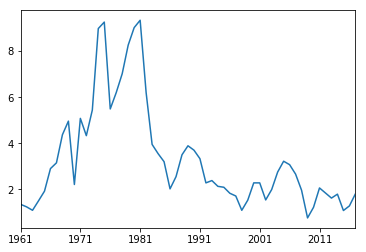

In [6]:
# chart the US inflation rate
dfts_us.plot()

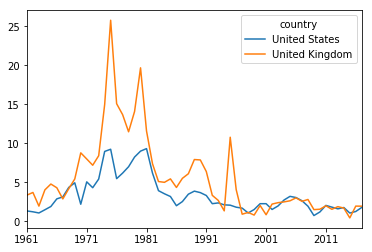

In [7]:
# Compare 2 countries' inflation rates
countries = ['United States','United Kingdom']
dfts[countries].plot()

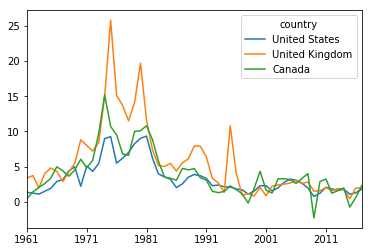

In [8]:
# Compare 3 countries' inflation rates
countries = ['United States','United Kingdom', 'Canada']
dfts[countries].plot()

In [9]:
# define the G7 set of countries
G7 = ['Canada', 'France', 'Germany', 'Italy', 'Spain', 'United Kingdom',
      'United States']

In [10]:
dfts[-20:][G7]

country,Canada,France,Germany,Italy,Spain,United Kingdom,United States
1998,-0.18,0.982,0.608,2.53,2.53,1.16,1.09
1999,1.9,0.218,0.318,1.62,2.66,0.819,1.53
2000,4.34,1.6,-0.45,1.97,3.28,2.05,2.28
2001,1.66,2.04,1.28,2.99,4.08,0.862,2.28
2002,1.24,2.08,1.35,3.35,4.11,2.23,1.54
2003,3.26,1.86,1.21,3.18,3.92,2.41,1.99
2004,3.28,1.67,1.09,2.52,3.92,2.51,2.75
2005,3.15,1.99,0.621,1.89,4.15,2.65,3.22
2006,2.61,2.23,0.304,1.9,3.98,3.03,3.07
2007,3.32,2.62,1.7,2.43,3.33,2.58,2.66


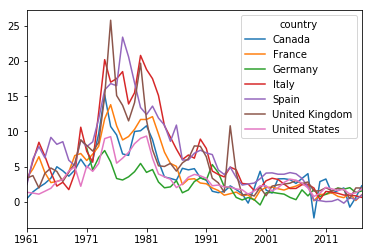

In [11]:
# show inflation for the G7 set of countries
dfts[G7].plot()

In [12]:
# define the G8 set of countries
G8 = G7.copy()
G8.append('Russia')
print(G8)

['Canada', 'France', 'Germany', 'Italy', 'Spain', 'United Kingdom', 'United States', 'Russia']


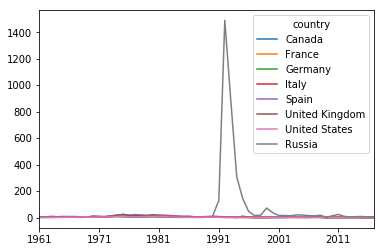

In [13]:
# show inflation for the G8 set of countries
dfts[G8].plot()

In [14]:
# Locate hyper-inflation years in Russia
dfts_ru = dfts["Russia"]
dfts_ru[dfts_ru > 100]

1991     129
1992    1490
1993     888
1994     307
1995     144
Name: Russia, dtype: object

Additional data, commentary on Russia inflation<br>
http://www.sjsu.edu/faculty/watkins/russianinfl.htm